In [1]:
import pandas as pd
import numpy as np
import psycopg2
import datetime
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute("SELECT * FROM msu_analytics.game")


data = cur.fetchall()


df = pd.read_sql("SELECT * FROM msu_analytics.game", conn)
df.head()

C:\Users\ivanz\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,game_rk,quest_rk,employee_rk,game_dttm,price,game_flg,finish_flg,time
0,22,2,14,2022-12-14 12:04:00.773186,2461.88,1,1,20:34:46
1,54,22,1,2022-10-25 20:09:48.591832,2093.63,1,0,22:20:10
2,70,14,10,2023-01-21 17:53:24.643384,1955.76,1,1,20:44:50
3,102,25,5,2022-11-21 03:42:13.494004,1156.75,1,1,16:45:18
4,150,29,13,2022-12-29 16:17:59.851944,1579.96,1,0,07:18:03


### Следующие ячейки - загрузка и первичный просмотр данных для выполнения задачи

In [3]:
df.shape
game_size = df.shape[0]
game_size

456

In [4]:
sum(df['game_flg'])

179

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   game_rk      456 non-null    int64         
 1   quest_rk     456 non-null    int64         
 2   employee_rk  456 non-null    int64         
 3   game_dttm    456 non-null    datetime64[ns]
 4   price        456 non-null    float64       
 5   game_flg     456 non-null    int64         
 6   finish_flg   456 non-null    int64         
 7   time         456 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 28.6+ KB


In [6]:
df.head()

,game_rk,quest_rk,employee_rk,game_dttm,price,game_flg,finish_flg,time
0,22,2,14,2022-12-14 12:04:00.773186,2461.88,1,1,20:34:46
1,54,22,1,2022-10-25 20:09:48.591832,2093.63,1,0,22:20:10
2,70,14,10,2023-01-21 17:53:24.643384,1955.76,1,1,20:44:50
3,102,25,5,2022-11-21 03:42:13.494004,1156.75,1,1,16:45:18
4,150,29,13,2022-12-29 16:17:59.851944,1579.96,1,0,07:18:03


In [7]:
df_app = pd.read_sql("SELECT * FROM msu_analytics.application", conn)
df_app.head()

C:\Users\ivanz\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,application_rk,account_rk,game_rk,application_dttm
0,166,478,168,2022-10-07 23:42:52.846530
1,70,591,73,2022-10-17 04:18:19.702450
2,182,751,317,2023-01-14 22:54:29.038422
3,214,588,353,2022-10-26 19:27:00.644505
4,150,588,269,2022-10-20 15:24:23.286048


In [8]:
app_size = df_app.shape[0]
app_size

512

In [9]:
df_app['application_rk'].nunique()

512

In [10]:
df_app['game_rk'].nunique()

315

In [11]:
df_app['account_rk'].nunique()

293

In [12]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   application_rk    512 non-null    int64         
 1   account_rk        512 non-null    int64         
 2   game_rk           512 non-null    int64         
 3   application_dttm  512 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 16.1 KB


In [13]:
df_acc = pd.read_sql("SELECT * FROM msu_analytics.account", conn)
df_acc.head()

C:\Users\ivanz\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,account_rk,client_rk,registration_dttm,login,password,email
0,12,3,2022-09-26 04:34:12.392193,rodion19,OdsHwVZwJBmL,rodion198@example.org
1,28,3557,2022-09-17 05:44:13.418250,marta05,MR01ol1SDO1,marta0584@example.com
2,44,316,2023-01-30 11:08:25.162311,dnesterova,wRRPxD6mm,dnesterova76@example.net
3,60,2039,2022-10-04 19:38:18.890876,klementina.mamontov,LyL0WMTqh,klementina.mamontov24@example.net
4,76,769,2022-11-27 21:07:23.897170,olesa83,JeEhGRixB,olesa8375@example.com


In [14]:
acc_size = df_acc.shape[0]
acc_size

1024

In [15]:
df_acc['client_rk'].nunique()

1024

In [16]:
df_client = pd.read_sql("SELECT * FROM msu_analytics.client", conn)
df_client.head()

C:\Users\ivanz\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client_rk,first_name,last_name,phone_num,visit_dttm
0,28,Родион,Ильин,+79685707345,2022-11-28 07:57:58.338674
1,108,Раиса,Никифорова,+79664187124,2023-01-04 05:31:33.158886
2,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591
3,204,Клим,Лыткин,+79633966259,2023-01-06 06:10:40.488902
4,220,Валентина,Дементьева,+79537555870,2022-09-09 21:54:34.067697


In [17]:
client_size = df_client.shape[0]
client_size

4096

In [18]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_rk   4096 non-null   int64         
 1   first_name  4096 non-null   object        
 2   last_name   4096 non-null   object        
 3   phone_num   4096 non-null   object        
 4   visit_dttm  4096 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 160.1+ KB


In [19]:
df_client['client_rk'].nunique()

4096

### Собираем данные в общую таблицу и разбиваем даты

In [20]:
#Создание общей таблицы со всеми данным
df_all = df_client.merge(df_acc, how='left')
df_all = df_all.merge(df_app, how = 'left')
df_all = df_all.merge(df, how = 'left')
df_all.head(100)

,client_rk,first_name,last_name,phone_num,visit_dttm,account_rk,registration_dttm,login,password,email,application_rk,game_rk,application_dttm,quest_rk,employee_rk,game_dttm,price,game_flg,finish_flg,time
0,28,Родион,Ильин,+79685707345,2022-11-28 07:57:58.338674,83.0,2022-11-28 19:35:58.822476,bragin.ksenia,FUV7mFSQSpKL,bragin.ksenia81@example.net,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,108,Раиса,Никифорова,+79664187124,2023-01-04 05:31:33.158886,424.0,2023-01-04 20:19:28.012508,ybelakov,hSvgXqqM,ybelakov93@example.com,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591,623.0,2022-11-04 14:55:44.395673,wgerasimov,9dHMr6rzH,wgerasimov84@example.org,390.0,200.0,2022-11-13 08:58:18.477114,31.0,3.0,2023-03-03 16:45:15.365946,2253.45,0.0,0.0,00:00:00
3,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591,623.0,2022-11-04 14:55:44.395673,wgerasimov,9dHMr6rzH,wgerasimov84@example.org,294.0,28.0,2022-11-08 00:33:12.160910,25.0,15.0,2022-12-25 05:06:20.887305,1438.58,0.0,0.0,00:00:00
4,204,Клим,Лыткин,+79633966259,2023-01-06 06:10:40.488902,980.0,2023-01-06 13:54:51.512328,gleb86,X2r5C0Ee9F6,gleb8616@example.net,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,Игорь,Константинов,+79665777743,2022-10-10 02:37:31.892326,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96,76,Владлен,Соколов,+79688070514,2023-01-01 05:37:55.718951,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
97,92,Рената,Цветкова,+79089964406,2022-09-06 16:11:44.296348,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN
98,140,Олег,Ильин,+79644210137,2022-09-11 17:50:37.542057,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [21]:
#Разбивка дат на составляющие

df_all['visit_day']=df_all["visit_dttm"].dt.day
df_all['visit_month']=df_all["visit_dttm"].dt.month
df_all['visit_year']=df_all["visit_dttm"].dt.year

df_all['registration_day']=df_all["registration_dttm"].dt.day
df_all['registration_month']=df_all["registration_dttm"].dt.month
df_all['registration_year']=df_all["registration_dttm"].dt.year

df_all['application_day']=df_all["application_dttm"].dt.day
df_all['application_month']=df_all["application_dttm"].dt.month
df_all['application_year']=df_all["application_dttm"].dt.year

df_all['game_day']=df_all["game_dttm"].dt.day
df_all['game_month']=df_all["game_dttm"].dt.month
df_all['game_year']=df_all["game_dttm"].dt.year

df_all.head(30)

,client_rk,first_name,last_name,phone_num,visit_dttm,account_rk,registration_dttm,login,password,email,application_rk,game_rk,application_dttm,quest_rk,employee_rk,game_dttm,price,game_flg,finish_flg,time,visit_day,visit_month,visit_year,registration_day,registration_month,registration_year,application_day,application_month,application_year,game_day,game_month,game_year
0,28,Родион,Ильин,+79685707345,2022-11-28 07:57:58.338674,83.0,2022-11-28 19:35:58.822476,bragin.ksenia,FUV7mFSQSpKL,bragin.ksenia81@example.net,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,28,11,2022,28.0,11.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN
1,108,Раиса,Никифорова,+79664187124,2023-01-04 05:31:33.158886,424.0,2023-01-04 20:19:28.012508,ybelakov,hSvgXqqM,ybelakov93@example.com,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,4,1,2023,4.0,1.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN
2,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591,623.0,2022-11-04 14:55:44.395673,wgerasimov,9dHMr6rzH,wgerasimov84@example.org,390.0,200.0,2022-11-13 08:58:18.477114,31.0,3.0,2023-03-03 16:45:15.365946,2253.45,0.0,0.0,00:00:00,3,11,2022,4.0,11.0,2022.0,13.0,11.0,2022.0,3.0,3.0,2023.0
3,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591,623.0,2022-11-04 14:55:44.395673,wgerasimov,9dHMr6rzH,wgerasimov84@example.org,294.0,28.0,2022-11-08 00:33:12.160910,25.0,15.0,2022-12-25 05:06:20.887305,1438.58,0.0,0.0,00:00:00,3,11,2022,4.0,11.0,2022.0,8.0,11.0,2022.0,25.0,12.0,2022.0
4,204,Клим,Лыткин,+79633966259,2023-01-06 06:10:40.488902,980.0,2023-01-06 13:54:51.512328,gleb86,X2r5C0Ee9F6,gleb8616@example.net,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,6,1,2023,6.0,1.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN
5,220,Валентина,Дементьева,+79537555870,2022-09-09 21:54:34.067697,979.0,2022-09-10 16:34:11.040119,silov.emma,OnM3aIbioM,silov.emma95@example.org,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,9,9,2022,10.0,9.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN
6,359,Федосья,Архипова,+79094880188,2022-09-12 06:42:46.153854,927.0,2022-09-12 15:18:45.401781,inessa07,mXujNUz3A4,inessa0742@example.net,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,12,9,2022,12.0,9.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN
7,375,Зинаида,Евсеева,+79536995283,2022-09-14 06:17:58.802436,828.0,2022-09-14 21:50:06.703828,stepan.maksimova,X9D6hydVd,stepan.maksimova70@example.org,499.0,35.0,2022-09-23 05:37:06.141308,24.0,13.0,2023-02-03 00:02:02.580627,1115.18,0.0,0.0,00:00:00,14,9,2022,14.0,9.0,2022.0,23.0,9.0,2022.0,3.0,2.0,2023.0
8,439,Федосья,Гришина,+79656219524,2023-01-23 08:04:45.590860,70.0,2023-01-23 22:25:48.196779,aleksandrov.lusa,xDb5nGwZMbrF,aleksandrov.lusa69@example.com,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,23,1,2023,23.0,1.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN
9,518,Трофим,Рогов,+79095663304,2022-12-22 05:38:45.887981,770.0,2022-12-23 03:30:15.446480,lada37,ZPhYKNWGTN,lada3717@example.net,500.0,302.0,2022-12-29 05:52:41.573813,15.0,15.0,2023-03-01 16:17:41.371658,2277.81,0.0,0.0,00:00:00,22,12,2022,23.0,12.0,2022.0,29.0,12.0,2022.0,1.0,3.0,2023.0


### Считаем конверсии по месяцам и отбираем нужные данные

In [22]:
#подсчет количества игр и конверсий с агрегацией по месяцу

df_count_p = pd.DataFrame()

df_count_p = df_all.groupby(['visit_month']).agg({'visit_dttm':'count', 'registration_dttm':'count',
                                                  'game_dttm':'count',
                                                  'game_flg':'sum', 'finish_flg':'sum'})

df_count_p['registration_percent'] = df_count_p['registration_dttm']*100/df_count_p['visit_dttm']
df_count_p['game_percent'] = df_count_p['game_dttm']*100/df_count_p['visit_dttm']
df_count_p['game_start_percent'] = df_count_p['game_flg']*100/df_count_p['visit_dttm']
df_count_p['game_end_percent'] = df_count_p['finish_flg']*100/df_count_p['visit_dttm']

df_count_p.head()

,visit_dttm,registration_dttm,game_dttm,game_flg,finish_flg,registration_percent,game_percent,game_start_percent,game_end_percent
visit_month,,,,,,,,,
1,899,260,111,21.0,14.0,28.921023,12.347052,2.335929,1.557286
2,32,8,0,0.0,0.0,25.000000,0.000000,0.000000,0.000000
9,818,230,91,59.0,28.0,28.117359,11.124694,7.212714,3.422983
10,887,261,109,74.0,32.0,29.425028,12.288613,8.342728,3.607666
11,831,245,101,71.0,39.0,29.482551,12.154031,8.543923,4.693141


In [23]:
#размещаем месяца в хронологическом порядке
d_add = df_count_p.iloc[[0,1]]
df_count_p = df_count_p.drop([1,2], axis = 0)
df_count_p = pd.concat([df_count_p, d_add])
df_count_p.head(10)

,visit_dttm,registration_dttm,game_dttm,game_flg,finish_flg,registration_percent,game_percent,game_start_percent,game_end_percent
visit_month,,,,,,,,,
9,818,230,91,59.0,28.0,28.117359,11.124694,7.212714,3.422983
10,887,261,109,74.0,32.0,29.425028,12.288613,8.342728,3.607666
11,831,245,101,71.0,39.0,29.482551,12.154031,8.543923,4.693141
12,848,239,100,39.0,20.0,28.183962,11.792453,4.599057,2.358491
1,899,260,111,21.0,14.0,28.921023,12.347052,2.335929,1.557286
2,32,8,0,0.0,0.0,25.000000,0.000000,0.000000,0.000000


### Считаем конверсии по неделям и отбираем нужные данные

In [24]:
#добавляем номер недели к датам
df_all['registration_week'] = df_all['registration_dttm'].dt.weekofyear
df_all['visit_week'] = df_all['visit_dttm'].dt.weekofyear
df_all['game_week'] = df_all['game_dttm'].dt.weekofyear

df_count_pw = pd.DataFrame()

df_count_pw = df_all.groupby(['visit_week']).agg({'visit_dttm':'count', 'registration_dttm':'count',
                                                  'game_dttm':'count',
                                                  'game_flg':'sum', 'finish_flg':'sum'})

df_count_pw['registration_percent'] = df_count_pw['registration_dttm']*100/df_count_pw['visit_dttm']
df_count_pw['game_percent'] = df_count_pw['game_dttm']*100/df_count_pw['visit_dttm']
df_count_pw['game_start_percent'] = df_count_pw['game_flg']*100/df_count_pw['visit_dttm']
df_count_pw['game_end_percent'] = df_count_pw['finish_flg']*100/df_count_pw['visit_dttm']

#появились недели без игр, заполним их нулями
df_count_pw = df_count_pw.fillna(0)

C:\Users\ivanz\AppData\Local\Temp\ipykernel_5600\2631773184.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_all['registration_week'] = df_all['registration_dttm'].dt.weekofyear
C:\Users\ivanz\AppData\Local\Temp\ipykernel_5600\2631773184.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_all['visit_week'] = df_all['visit_dttm'].dt.weekofyear
C:\Users\ivanz\AppData\Local\Temp\ipykernel_5600\2631773184.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_all['game_week'] = df_all['game_dttm'].dt.weekofyear


In [25]:
#размещаем месяца в хронологическом порядке
d_add = df_count_pw.iloc[range(0,5)]
df_count_pw = df_count_pw.drop(range(1,6), axis = 0)
df_count_pw = pd.concat([df_count_pw, d_add])
df_count_pw

,visit_dttm,registration_dttm,game_dttm,game_flg,finish_flg,registration_percent,game_percent,game_start_percent,game_end_percent
visit_week,,,,,,,,,
35,119,40,15,8.0,3.0,33.613445,12.605042,6.722689,2.521008
36,187,34,9,6.0,2.0,18.181818,4.812834,3.208556,1.069519
37,178,54,27,11.0,5.0,30.337079,15.168539,6.179775,2.808989
38,190,54,21,18.0,12.0,28.421053,11.052632,9.473684,6.315789
39,212,76,34,26.0,10.0,35.849057,16.037736,12.264151,4.716981
40,213,67,27,22.0,9.0,31.455399,12.676056,10.328638,4.225352
41,197,51,20,17.0,9.0,25.888325,10.152284,8.629442,4.568528
42,179,49,20,14.0,8.0,27.374302,11.173184,7.821229,4.469274
43,201,60,27,11.0,2.0,29.850746,13.432836,5.472637,0.995025


### Визуализация

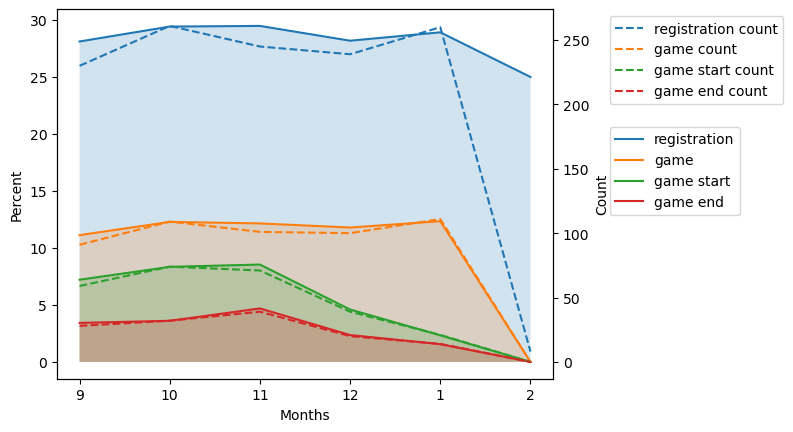

In [26]:
#в динамике по месяцам

fig, ax = plt.subplots()
ax.plot( df_count_p.index.astype(str), df_count_p['registration_percent'],
         df_count_p.index.astype(str), df_count_p['game_percent'],
         df_count_p.index.astype(str), df_count_p['game_start_percent'],
         df_count_p.index.astype(str), df_count_p['game_end_percent'])
ax.set_ylabel('Percent')
ax.set_xlabel('Months')

ax.fill_between(df_count_p.index.astype(str), df_count_p['registration_percent'], alpha=0.2)
ax.fill_between(df_count_p.index.astype(str), df_count_p['game_percent'], alpha=0.2)
ax.fill_between(df_count_p.index.astype(str), df_count_p['game_start_percent'], alpha=0.2)
ax.fill_between(df_count_p.index.astype(str), df_count_p['game_end_percent'], alpha=0.2)

ax2 = ax.twinx()
ax2.plot(df_count_p.index.astype(str), df_count_p['registration_dttm'],"--",
         df_count_p.index.astype(str), df_count_p['game_dttm'],"--",
         df_count_p.index.astype(str), df_count_p['game_flg'],"--",
         df_count_p.index.astype(str), df_count_p['finish_flg'],"--")
ax2.set_ylabel('Count')


ax.legend(['registration', 'game', 'game start', 'game end'],  bbox_to_anchor=(1.1, 0.7), loc='upper left')
ax2.legend(['registration count', 'game count', 'game start count', 'game end count'],  bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

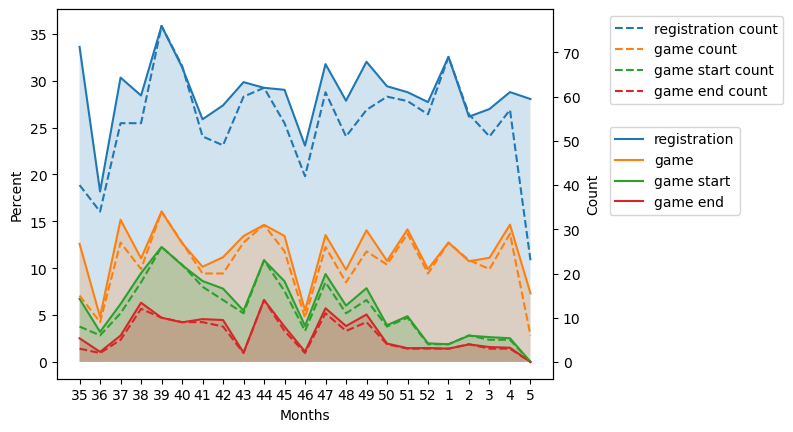

In [27]:
#в динамике по неделям

fig, ax = plt.subplots()
ax.plot( df_count_pw.index.astype(str), df_count_pw['registration_percent'],
         df_count_pw.index.astype(str), df_count_pw['game_percent'],
         df_count_pw.index.astype(str), df_count_pw['game_start_percent'],
         df_count_pw.index.astype(str), df_count_pw['game_end_percent'])
ax.set_ylabel('Percent')
ax.set_xlabel('Months')

ax.fill_between(df_count_pw.index.astype(str), df_count_pw['registration_percent'], alpha=0.2)
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['game_percent'], alpha=0.2)
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['game_start_percent'], alpha=0.2)
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['game_end_percent'], alpha=0.2)

ax2 = ax.twinx()
ax2.plot(df_count_pw.index.astype(str), df_count_pw['registration_dttm'],"--",
         df_count_pw.index.astype(str), df_count_pw['game_dttm'],"--",
         df_count_pw.index.astype(str), df_count_pw['game_flg'],"--",
         df_count_pw.index.astype(str), df_count_pw['finish_flg'],"--")
ax2.set_ylabel('Count')


ax.legend(['registration', 'game', 'game start', 'game end'], bbox_to_anchor=(1.1, 0.7), loc='upper left')
ax2.legend(['registration count', 'game count', 'game start count', 'game end count'], bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

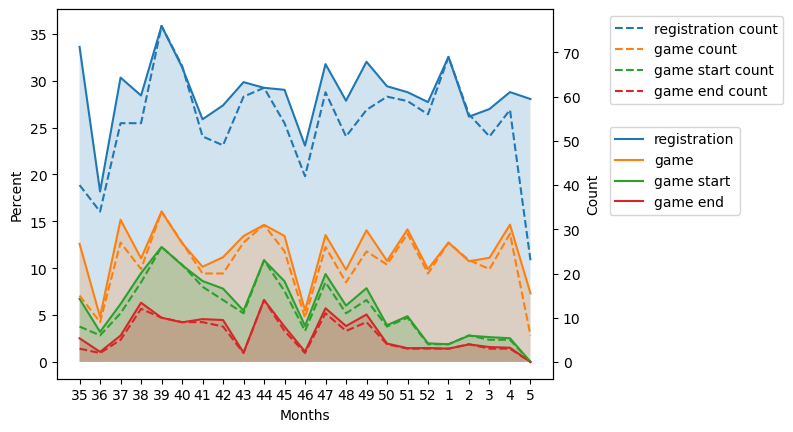

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# plot lines
ax.plot(df_count_pw.index.astype(str), df_count_pw['registration_percent'],
        df_count_pw.index.astype(str), df_count_pw['game_percent'],
        df_count_pw.index.astype(str), df_count_pw['game_start_percent'],
        df_count_pw.index.astype(str), df_count_pw['game_end_percent'])

# fill areas
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['registration_percent'], alpha=0.2)
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['game_percent'], alpha=0.2)
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['game_start_percent'], alpha=0.2)
ax.fill_between(df_count_pw.index.astype(str), df_count_pw['game_end_percent'], alpha=0.2)

# set labels
ax.set_ylabel('Percent')
ax.set_xlabel('Months')

# plot twinx lines
ax2 = ax.twinx()
ax2.plot(df_count_pw.index.astype(str), df_count_pw['registration_dttm'], "--",
         df_count_pw.index.astype(str), df_count_pw['game_dttm'], "--",
         df_count_pw.index.astype(str), df_count_pw['game_flg'], "--",
         df_count_pw.index.astype(str), df_count_pw['finish_flg'], "--")

# set labels for twinx lines
ax2.set_ylabel('Count')

# set legends
ax.legend(['registration', 'game', 'game start', 'game end'], bbox_to_anchor=(1.1, 0.7), loc='upper left')
ax2.legend(['registration count', 'game count', 'game start count', 'game end count'], bbox_to_anchor=(1.1, 1), loc='upper left')

# show the plot
plt.show()